**1.Pick a random news article (preferably with many entity mentions) from your Webhose dataset**

In [102]:
apikey = 'jo9nPNdZVFzNJeglmh-aUwnPKB-ZaJMLHt8tJ47ff9UH'
url = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/b3451914-8d60-40d3-9efe-ba881a14e34e'

**2. IBM Watson NLU API Installation**

In [103]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions

authenticator = IAMAuthenticator(apikey)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url(url)

response = natural_language_understanding.analyze(
    url="https://www.express.co.uk/life-style/science-technology/1334712/Spotify-Update-New-Karaoke-Mode-vs-Apple-Music-TIDAL-UK",
    features=Features(entities=EntitiesOptions(sentiment=False,limit=10))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 1958,
    "features": 1
  },
  "retrieved_url": "https://www.express.co.uk/life-style/science-technology/1334712/Spotify-Update-New-Karaoke-Mode-vs-Apple-Music-TIDAL-UK",
  "language": "en",
  "entities": [
    {
      "type": "Company",
      "text": "Spotify",
      "relevance": 0.993399,
      "disambiguation": {
        "subtype": [
          "Software"
        ],
        "name": "Spotify",
        "dbpedia_resource": "http://dbpedia.org/resource/Spotify"
      },
      "count": 9,
      "confidence": 1
    },
    {
      "type": "Person",
      "text": "Jane Manchun Wong",
      "relevance": 0.422448,
      "count": 1,
      "confidence": 0.623383
    },
    {
      "type": "Company",
      "text": "Apple Music",
      "relevance": 0.364987,
      "count": 1,
      "confidence": 0.501367
    },
    {
      "type": "Person",
      "text": "Wong",
      "relevance": 0.190225,
      "count": 1,
      "confidence": 0.996201
  

**Additional: Using Spacy**

In [104]:
# Use urllib or requests package to read this article through its URL link
import urllib
html = urllib.request.urlopen('https://www.express.co.uk/life-style/science-technology/1334712/Spotify-Update-New-Karaoke-Mode-vs-Apple-Music-TIDAL-UK').read()

In [105]:
# Use BeautifulSoup (Links to an external site.) or another HTML parsing package to extract text from the article.
from bs4 import BeautifulSoup
from bs4.element import Comment

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)
    return u" ".join(t.strip() for t in visible_texts)

url_=text_from_html(html)

In [106]:
import spacy as sp

In [107]:
# Load pre-existing spacy model
nlp = sp.load("en_core_web_sm")

In [108]:
#Count number of entities
article = nlp(url_)
from collections import Counter
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 51,
         'CARDINAL': 11,
         'FAC': 2,
         'NORP': 3,
         'PERSON': 20,
         'TIME': 2,
         'EVENT': 2,
         'MONEY': 1,
         'DATE': 14,
         'LOC': 3,
         'WORK_OF_ART': 4,
         'GPE': 8,
         'PRODUCT': 1,
         'ORDINAL': 1})

In [109]:
# Visualization of entities from the article
from spacy import displacy
options = {"ents":["ORG","GPE"]}
displacy.render(article, style ="ent", options = options, jupyter = True)

In [110]:
# Extract Company/Organization and Geo entities from the article chosen
for x in article.ents:
    if x.label_ == 'ORG' or x.label_ == 'GPE':
        print(x.label_ + ' - ' + x.text)

ORG - Sunday Express
ORG - Twitter
ORG - Sport  
ORG - Entertainment  Life & Style  
ORG - Apple Music
ORG - TiDAL
ORG - SPOTIFY
ORG - app
ORG - GETTY
ORG - the Secret Elves Club
ORG - Apple
ORG - Apple
ORG - Apple Music
ORG - Apple Music
ORG - app
ORG - OVER
ORG - @wongmjane
ORG - app
ORG - Spotify
ORG - Apple TV
ORG - Rick-Rolled
ORG - Multi
ORG - app
ORG - NME
ORG - Spotify
ORG - Apple
GPE - China
GPE - China
GPE - Taiwan
GPE - Brexit
ORG - Sony
ORG - Apple
ORG - Amazon
ORG - BritBox
ORG - Alexa
ORG - iPhone
ORG - iPhones
ORG - Apple Event
ORG - NHS
ORG - iPhone
GPE - UK
ORG - Amazon
ORG - Microsoft
ORG - Virgin Media
ORG - Huawei
ORG - HarmonyOS
ORG - Apple
GPE - US
ORG - Twitter
ORG - Daily Express
GPE - Scotland
ORG - Latest News Brexit European Union
ORG - Celebrity News TV & Radio    
ORG - League Manchester
ORG - United Liverpool Arsenal Chelsea Tottenham Hotspur
ORG - Beach Holidays Short & City
ORG - Cruise    Entertainment
ORG - Apps Puzzles Horoscopes Discounts Shop Paper


In [111]:
#Create the list of Company or Organization entities in the picked article
org_list = []
for x in article.ents:
    if x.label_ == 'ORG'and x.text not in org_list:
        org_list.append(x.text)
org_list

['Sunday Express',
 'Twitter',
 'Sport  ',
 'Entertainment  Life & Style  ',
 'Apple Music',
 'TiDAL',
 'SPOTIFY',
 'app',
 'GETTY',
 'the Secret Elves Club',
 'Apple',
 'OVER',
 '@wongmjane',
 'Spotify',
 'Apple TV',
 'Rick-Rolled',
 'Multi',
 'NME',
 'Sony',
 'Amazon',
 'BritBox',
 'Alexa',
 'iPhone',
 'iPhones',
 'Apple Event',
 'NHS',
 'Microsoft',
 'Virgin Media',
 'Huawei',
 'HarmonyOS',
 'Daily Express',
 'Latest News Brexit European Union',
 'Celebrity News TV & Radio    ',
 'League Manchester',
 'United Liverpool Arsenal Chelsea Tottenham Hotspur',
 'Beach Holidays Short & City',
 'Cruise    Entertainment',
 'Apps Puzzles Horoscopes Discounts Shop Paper']

**3. Train Model**

In [112]:
import spacy
from spacy.util import minibatch, compounding
from pathlib import Path
import random


In [113]:
import os
os.getcwd()

'/Users/aimeetran/Desktop/COLUMBIA UNIVERSITY /FALL 2020/NLP'

In [114]:
import json
file = '/Users/aimeetran/Desktop/COLUMBIA UNIVERSITY /FALL 2020/NLP/webhose_apple.json'

In [115]:
json_data = open(file).readlines()
newsfeed = []
for line in json_data:
    newsfeed.append(json.loads(line))

In [116]:
target = newsfeed[1]
print(target)

{'thread': {'uuid': '6362a8581fe16ec11dfa7cb9527bd945bb96d076', 'url': 'https://www.express.co.uk/life-style/science-technology/1334712/Spotify-Update-New-Karaoke-Mode-vs-Apple-Music-TIDAL-UK', 'site_full': 'www.express.co.uk', 'site': 'express.co.uk', 'site_section': 'https://www.express.co.uk/life-style/science-technology', 'site_categories': ['media'], 'section_title': 'Tech | Life &amp; Style | Express.co.uk', 'title': 'Spotify working on new karaoke mode to challenge Apple Music and TiDAL', 'title_full': 'Spotify working on new karaoke mode to challenge Apple Music and TiDAL | Express.co.uk', 'published': '2020-09-12T16:18:00.000+03:00', 'replies_count': 0, 'participants_count': 1, 'site_type': 'news', 'country': 'GB', 'spam_score': 0.0, 'main_image': 'https://cdn.images.express.co.uk/img/dynamic/59/750x445/1334712.jpg', 'performance_score': 0, 'domain_rank': 2068, 'social': {'facebook': {'likes': 0, 'comments': 0, 'shares': 1}, 'gplus': {'shares': 0}, 'pinterest': {'shares': 0}, 

In [117]:
docs = nlp(str(target))

In [118]:
TRAIN_DATA = []

for ent in docs.ents:
    TRAIN_DATA.append((ent.text,
    {'entities':[(ent.start_char,ent.end_char,ent.label_)]}))


In [119]:
for item in TRAIN_DATA:
    print(item,sep='\n')

("Style | Express.co.uk'", {'entities': [(394, 416, 'ORG')]})
('Apple Music', {'entities': [(477, 488, 'ORG')]})
('Apple Music', {'entities': [(565, 576, 'ORG')]})
("TiDAL | Express.co.uk'", {'entities': [(581, 603, 'PRODUCT')]})
('2020-09-12T16:18:00.000', {'entities': [(619, 642, 'DATE')]})
('03:00', {'entities': [(643, 648, 'TIME')]})
('0', {'entities': [(668, 669, 'CARDINAL')]})
('1', {'entities': [(693, 694, 'CARDINAL')]})
('0.0', {'entities': [(748, 751, 'CARDINAL')]})
('https://cdn.images.express.co.uk/img/dynamic/59/750x445/1334712.jpg', {'entities': [(768, 835, 'ORG')]})
('0', {'entities': [(859, 860, 'CARDINAL')]})
('2068', {'entities': [(877, 881, 'CARDINAL')]})
('0', {'entities': [(916, 917, 'CARDINAL')]})
('0', {'entities': [(931, 932, 'CARDINAL')]})
('1', {'entities': [(944, 945, 'CARDINAL')]})
('0', {'entities': [(968, 969, 'CARDINAL')]})
('0', {'entities': [(996, 997, 'CARDINAL')]})
('linkedin', {'entities': [(1001, 1009, 'PERSON')]})
('0', {'entities': [(1023, 1024, 'C

In [120]:
# create the built-in pipeline components and add them to the pipeline
# nlp.create_pipe works for built-ins that are registered with spaCy
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe("ner")

In [121]:
# add labels
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

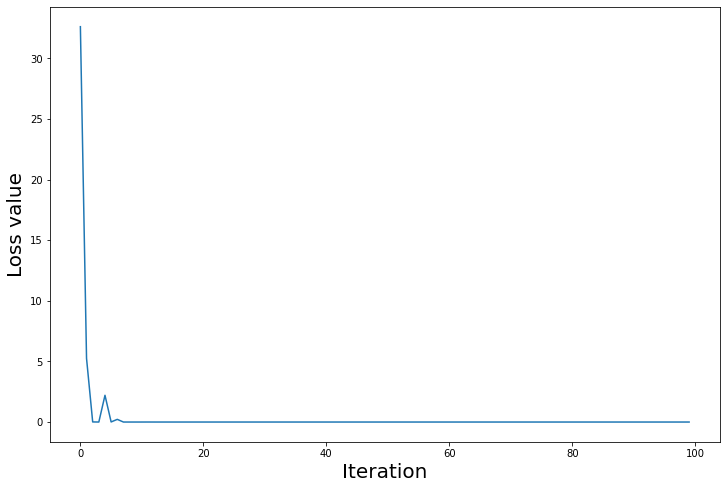

In [122]:
import matplotlib.pyplot as plt

def plot_loss_history(loss_history):
    f, ax = plt.subplots(1, 1, figsize=(12, 8)) # set the size of figures for plots
    plt.plot(loss_history)
    plt.xlabel('Iteration').set_fontsize(20)
    plt.ylabel('Loss value').set_fontsize(20)
    plt.show()
    return


n_iter=100
loss_history = []

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):  # only train NER
  
    nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(
                texts,  # batch of texts
                annotations,  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                losses=losses,
            )
        loss_history.append(losses['ner'])

# the loss should trend down
plot_loss_history(loss_history)

In [123]:
# test the trained model
for text, _ in TRAIN_DATA:
    doc = nlp(text)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities []
Tokens [('app', '', 2)]
Entities []
Tokens [('Jane', '', 2), ('Manchun', '', 2), ('Wong', '', 2)]
Entities []
Tokens [('0', '', 2)]
Entities []
Tokens [('Apple', '', 2), ('TV', '', 2)]
Entities []
Tokens [('Apple', '', 2), ('Music', '', 2)]
Entities []
Tokens [('0', '', 2)]
Entities []
Tokens [('0', '', 2)]
Entities []
Tokens [('4', '', 2)]
Entities []
Tokens [('firm.\\nInternet', '', 2)]
Entities []
Tokens [('0', '', 2)]
Entities []
Tokens [('0', '', 2)]
Entities []
Tokens [('GETTY', '', 2)]
Entities []
Tokens [('03:00', '', 2)]
Entities []
Tokens [('app', '', 2)]
Entities []
Tokens [('03:00', '', 2)]
Entities []
Tokens [('https://t.co/apeIlETAQs', '', 2)]
Entities []
Tokens [('Apple', '', 2), ('Music', '', 2)]
Entities []
Tokens [('Wong', '', 2)]
Entities []
Tokens [('NME', '', 2)]
Entities []
Tokens [('Apple', '', 2), ('Music', '', 2)]
Entities []
Tokens [('Spotify', '', 2)]
Entities []
Tokens [('parent_url', '', 2)]
Entities []
Tokens [('Jane', '', 2), ('Manchun', '', 2

Starting iteration 0
Starting iteration 5
Starting iteration 10
Starting iteration 15


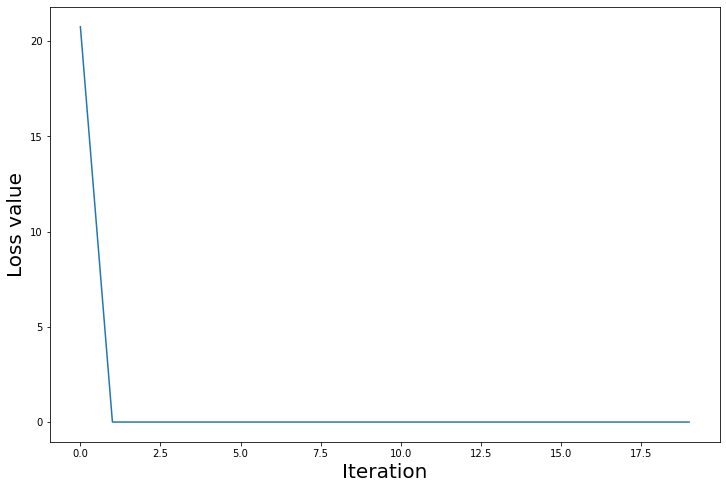

In [ ]:
def train_spacy(data,iterations):
    TRAIN_DATA = data
    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
       

    # add labels
    for _, annotations in TRAIN_DATA:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        loss_history = []
        for itn in range(iterations):
            if not itn % 5:
                print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            loss_history.append(losses['ner'])
    plot_loss_history(loss_history)
    return nlp


prdnlp = train_spacy(TRAIN_DATA, 20)

# Save our trained Model
modelfile = input("Enter your Model Name: ")
prdnlp.to_disk(modelfile)

#Test your text
test_text = input("Enter your testing text: ")
doc = prdnlp(test_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
